In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib
import warnings
import re
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
from PIL import Image
%matplotlib inline

warnings.filterwarnings("ignore")

## Problem 1:
## You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.


### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. 

In [2]:
data_df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [3]:
data_df.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [4]:
data_df.tail()

Unnamed: 0          vote  age  economic.cond.national  \
1520        1521  Conservative   67                       5   
1521        1522  Conservative   73                       2   
1522        1523        Labour   37                       3   
1523        1524  Conservative   61                       3   
1524        1525  Conservative   74                       2   

      economic.cond.household  Blair  Hague  Europe  political.knowledge  \
1520                        3      2      4      11                    3   
1521                        2      4      4       8                    2   
1522                        3      5      4       2                    2   
1523                        3      1      4      11                    2   
1524                        3      2      4      11                    0   

      gender  
1520    male  
1521    male  
1522    male  
1523    male  
1524  female

In [5]:
data_df=data_df.drop('Unnamed: 0',axis=1)

In [6]:
data_df.describe()

age  economic.cond.national  economic.cond.household  \
count  1525.000000             1525.000000              1525.000000   
mean     54.182295                3.245902                 3.140328   
std      15.711209                0.880969                 0.929951   
min      24.000000                1.000000                 1.000000   
25%      41.000000                3.000000                 3.000000   
50%      53.000000                3.000000                 3.000000   
75%      67.000000                4.000000                 4.000000   
max      93.000000                5.000000                 5.000000   

             Blair        Hague       Europe  political.knowledge  
count  1525.000000  1525.000000  1525.000000          1525.000000  
mean      3.334426     2.746885     6.728525             1.542295  
std       1.174824     1.230703     3.297538             1.083315  
min       1.000000     1.000000     1.000000             0.000000  
25%       2.000000     2.000000     4.000000             0.000000  
50%       4.000000     2.000000     6.000000             2.000000  
75%       4.000000     4.000000    10.000000             2.000000  
max       5.000000     5.000000    11.000000             3.000000

In [7]:
data_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [9]:
data_df.shape

(1525, 9)

In [10]:
dups=data_df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
data_df[dups]

Total no of duplicate values = 8


vote  age  economic.cond.national  economic.cond.household  \
67          Labour   35                       4                        4   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
983   Conservative   74                       4                        3   
1154  Conservative   53                       3                        4   
1236        Labour   36                       3                        3   
1244        Labour   29                       4                        4   
1438        Labour   40                       4                        3   

      Blair  Hague  Europe  political.knowledge  gender  
67        5      2       3                    2    male  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
983       2      4       8                    2  female  
1154      2      2       6                    0  female  
1236      2      2       6                    2  female  
1244      4      2       2                    2  female  
1438      4      2       2                    2    male

In [11]:
data_df=data_df.drop_duplicates()

In [12]:
dups=data_df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
data_df[dups]

Total no of duplicate values = 0


Empty DataFrame
Columns: [vote, age, economic.cond.national, economic.cond.household, Blair, Hague, Europe, political.knowledge, gender]
Index: []

In [13]:
for feature in data_df.columns:
    if data_df[feature].dtype=='object':
           print(feature.upper() ," ",data_df[feature].nunique())
           print(data_df[feature].value_counts().sort_values())
            

VOTE   2
Conservative     460
Labour          1057
Name: vote, dtype: int64
GENDER   2
male      709
female    808
Name: gender, dtype: int64


###  1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

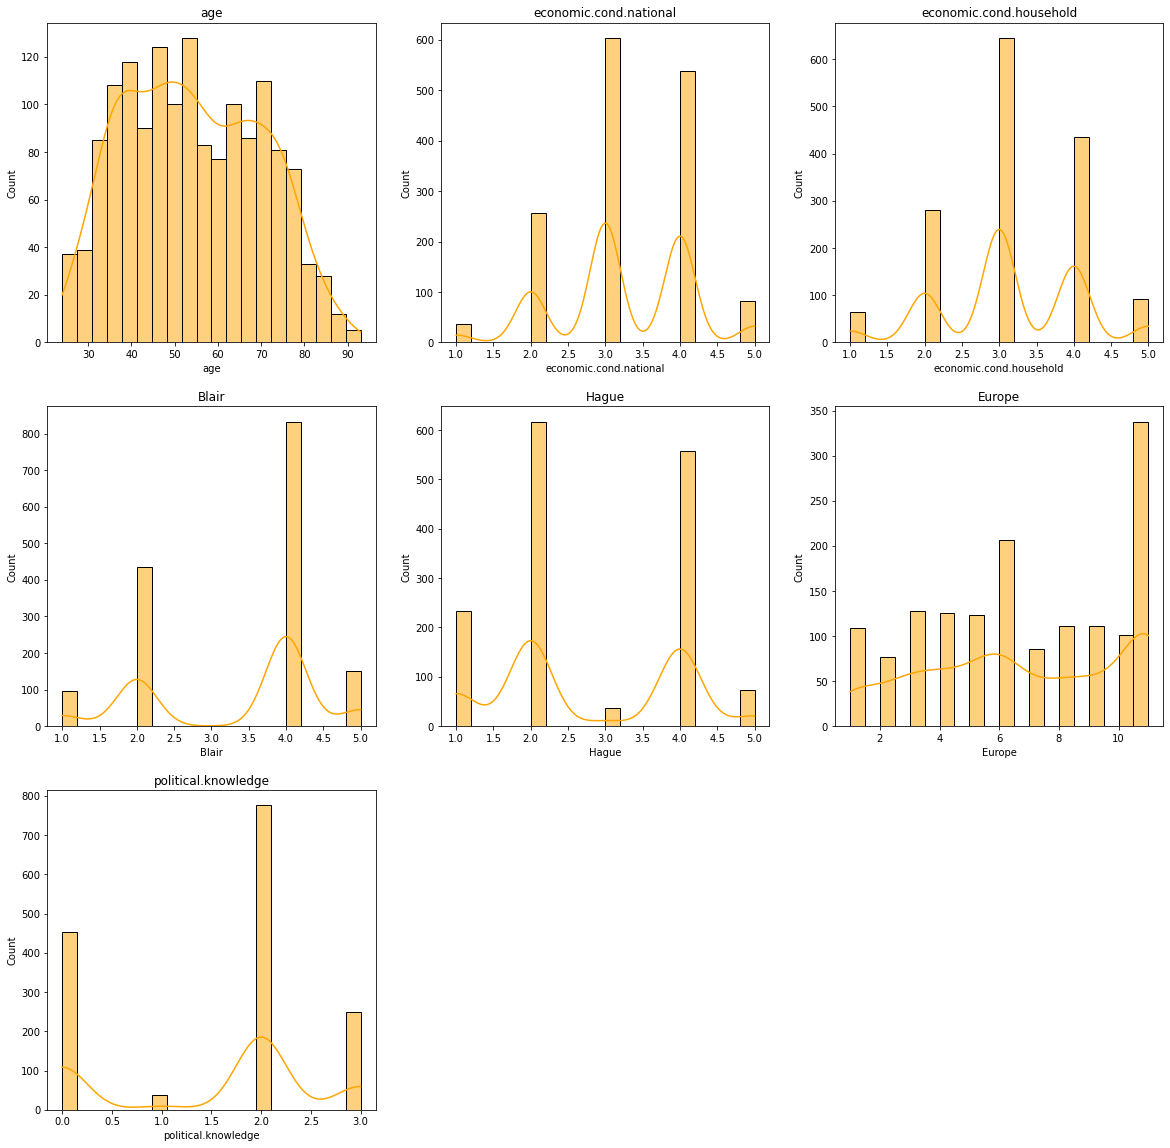

In [14]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1);
plt.title('age')
sns.histplot(data_df['age'],bins=20,color="orange",kde=True);

plt.subplot(3,3,2)
plt.title('economic.cond.national')
sns.histplot(data_df['economic.cond.national'],bins=20,color="orange",kde=True);

plt.subplot(3,3,3)
plt.title('economic.cond.household')
sns.histplot(data_df['economic.cond.household'],bins=20,color="orange",kde=True);

plt.subplot(3,3,4)
plt.title('Blair')
sns.histplot(data_df['Blair'],bins=20,color="orange",kde=True);

plt.subplot(3,3,5)
plt.title('Hague')
sns.histplot(data_df['Hague'],bins=20,color="orange",kde=True);

plt.subplot(3,3,6)
plt.title('Europe')
sns.histplot(data_df['Europe'],bins=20,color="orange",kde=True);

plt.subplot(3,3,7)
plt.title('political.knowledge')
sns.histplot(data_df['political.knowledge'],bins=20,color="orange",kde=True);

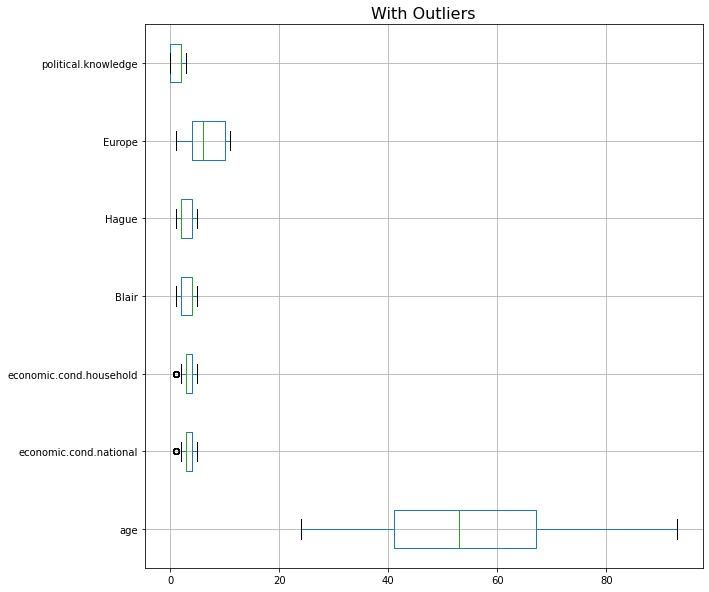

In [15]:
# construct box plot for continuous variables
cont=data_df.dtypes[(data_df.dtypes!='uint8') & (data_df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
data_df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [17]:
for column in data_df[['economic.cond.national','economic.cond.household']].columns:
    lr,ur=remove_outlier(data_df[column])
    data_df[column]=np.where(data_df[column]>ur,ur,data_df[column])
    data_df[column]=np.where(data_df[column]<lr,lr,data_df[column])

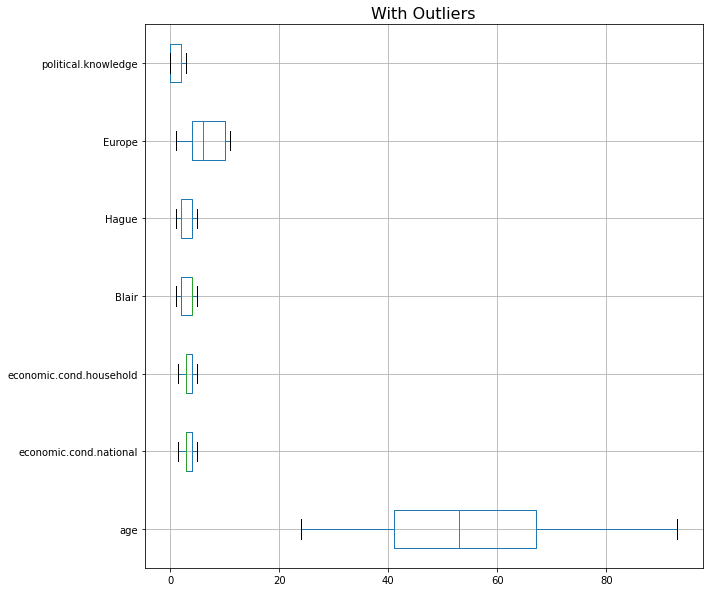

In [18]:
# construct box plot for continuous variables
cont=data_df.dtypes[(data_df.dtypes!='uint8') & (data_df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
data_df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

### Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
X = StandardScaler()

In [21]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1517 non-null   object 
 1   age                      1517 non-null   int64  
 2   economic.cond.national   1517 non-null   float64
 3   economic.cond.household  1517 non-null   float64
 4   Blair                    1517 non-null   int64  
 5   Hague                    1517 non-null   int64  
 6   Europe                   1517 non-null   int64  
 7   political.knowledge      1517 non-null   int64  
 8   gender                   1517 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 118.5+ KB


In [22]:
data_df[['age']]= X.fit_transform(data_df[['age']])
data_df

vote       age  economic.cond.national  economic.cond.household  \
0           Labour -0.716161                     3.0                      3.0   
1           Labour -1.162118                     4.0                      4.0   
2           Labour -1.225827                     4.0                      4.0   
3           Labour -1.926617                     4.0                      2.0   
4           Labour -0.843577                     2.0                      2.0   
...            ...       ...                     ...                      ...   
1520  Conservative  0.812836                     5.0                      3.0   
1521  Conservative  1.195085                     2.0                      2.0   
1522        Labour -1.098410                     3.0                      3.0   
1523  Conservative  0.430587                     3.0                      3.0   
1524  Conservative  1.258794                     2.0                      3.0   

      Blair  Hague  Europe  political.knowledge  gender  
0         4      1       2                    2  female  
1         4      4       5                    2    male  
2         5      2       3                    2    male  
3         2      1       4                    0  female  
4         1      1       6                    2    male  
...     ...    ...     ...                  ...     ...  
1520      2      4      11                    3    male  
1521      4      4       8                    2    male  
1522      5      4       2                    2    male  
1523      1      4      11                    2    male  
1524      2      4      11                    0  female  

[1517 rows x 9 columns]

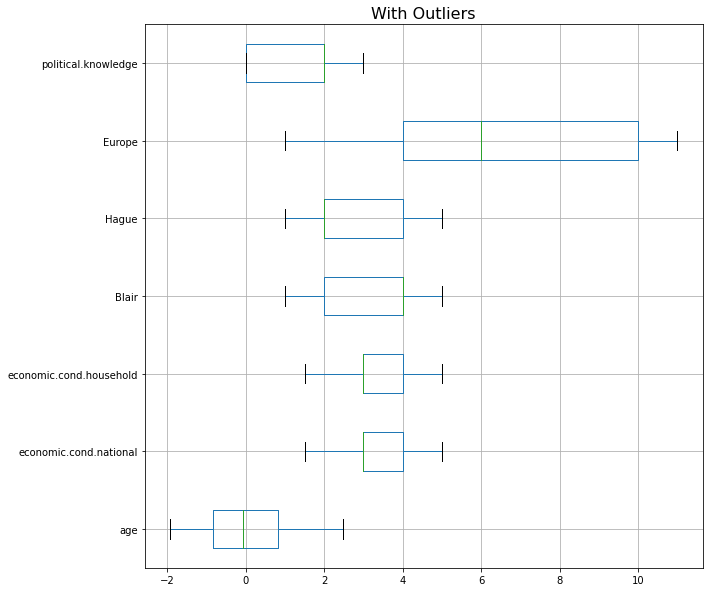

In [23]:
# construct box plot for continuous variables
cont=data_df.dtypes[(data_df.dtypes!='uint8') & (data_df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
data_df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

<Figure size 1080x1080 with 0 Axes>

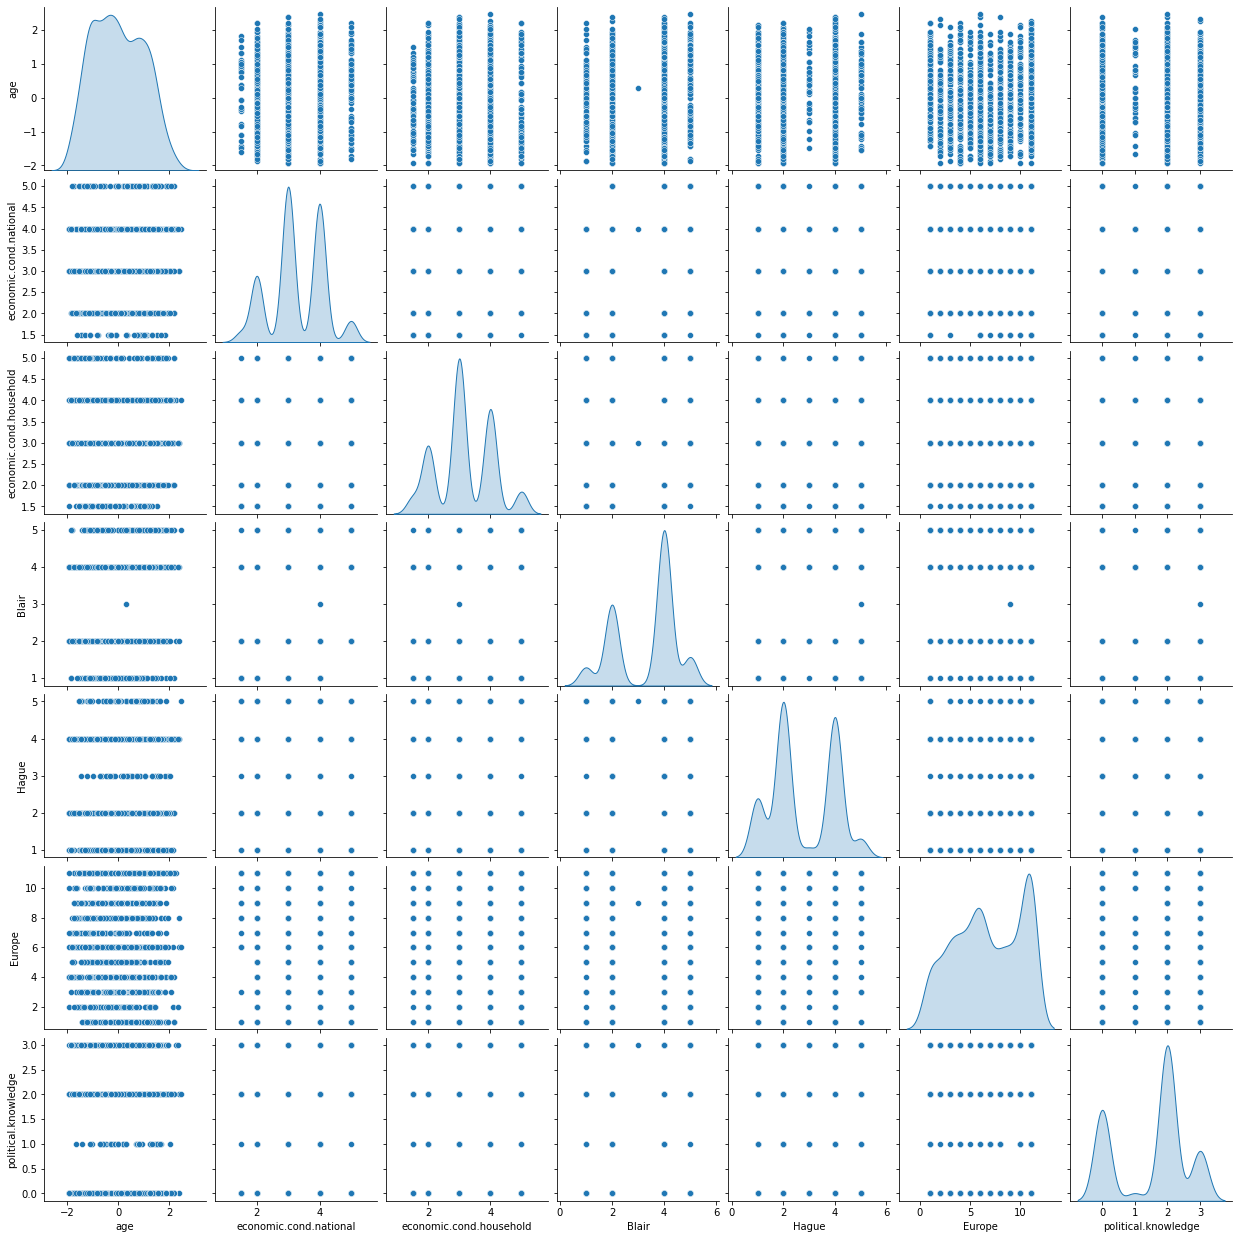

In [24]:
plt.figure(figsize=(15,15))
sns.pairplot(data_df, diag_kind = 'kde', corner=False);

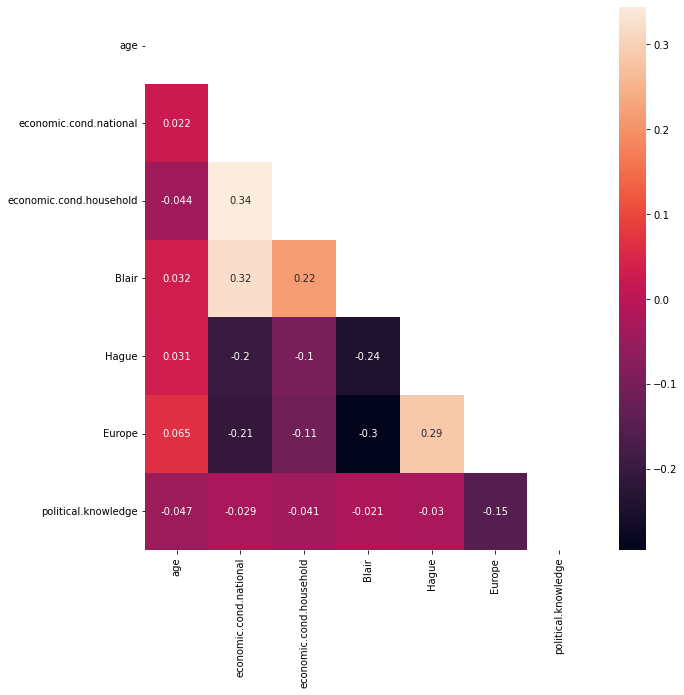

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(data_df.corr(),annot=True,mask =np.triu(np.ones_like(data_df.corr(), dtype=bool)));

In [26]:
data_df.head()

vote       age  economic.cond.national  economic.cond.household  Blair  \
0  Labour -0.716161                     3.0                      3.0      4   
1  Labour -1.162118                     4.0                      4.0      4   
2  Labour -1.225827                     4.0                      4.0      5   
3  Labour -1.926617                     4.0                      2.0      2   
4  Labour -0.843577                     2.0                      2.0      1   

   Hague  Europe  political.knowledge  gender  
0      1       2                    2  female  
1      4       5                    2    male  
2      2       3                    2    male  
3      1       4                    0  female  
4      1       6                    2    male

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

In [27]:
data_en= pd.get_dummies(data_df, columns=['vote','gender'],drop_first=True)

In [28]:
data_en.head()

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0 -0.716161                     3.0                      3.0      4      1   
1 -1.162118                     4.0                      4.0      4      4   
2 -1.225827                     4.0                      4.0      5      2   
3 -1.926617                     4.0                      2.0      2      1   
4 -0.843577                     2.0                      2.0      1      1   

   Europe  political.knowledge  vote_Labour  gender_male  
0       2                    2            1            0  
1       5                    2            1            1  
2       3                    2            1            1  
3       4                    0            1            0  
4       6                    2            1            1

In [29]:
data_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1517 non-null   float64
 1   economic.cond.national   1517 non-null   float64
 2   economic.cond.household  1517 non-null   float64
 3   Blair                    1517 non-null   int64  
 4   Hague                    1517 non-null   int64  
 5   Europe                   1517 non-null   int64  
 6   political.knowledge      1517 non-null   int64  
 7   vote_Labour              1517 non-null   uint8  
 8   gender_male              1517 non-null   uint8  
dtypes: float64(3), int64(4), uint8(2)
memory usage: 130.1 KB


In [30]:
data_en.describe()

age  economic.cond.national  economic.cond.household  \
count  1.517000e+03             1517.000000              1517.000000   
mean   1.917458e-17                3.257416                 3.159196   
std    1.000330e+00                0.853647                 0.886279   
min   -1.926617e+00                1.500000                 1.500000   
25%   -8.435773e-01                3.000000                 3.000000   
50%   -7.907881e-02                3.000000                 3.000000   
75%    8.128361e-01                4.000000                 4.000000   
max    2.469250e+00                5.000000                 5.000000   

             Blair        Hague       Europe  political.knowledge  \
count  1517.000000  1517.000000  1517.000000          1517.000000   
mean      3.335531     2.749506     6.740277             1.540541   
std       1.174772     1.232479     3.299043             1.084417   
min       1.000000     1.000000     1.000000             0.000000   
25%       2.000000     2.000000     4.000000             0.000000   
50%       4.000000     2.000000     6.000000             2.000000   
75%       4.000000     4.000000    10.000000             2.000000   
max       5.000000     5.000000    11.000000             3.000000   

       vote_Labour  gender_male  
count  1517.000000  1517.000000  
mean      0.696770     0.467370  
std       0.459805     0.499099  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     0.000000  
75%       1.000000     1.000000  
max       1.000000     1.000000

In [31]:
data_en=data_en.rename(columns={'vote_Labour':'IsLabour_or_not' ,'gender_male':'IsMale_or_not'},inplace= False)

In [32]:
data_NB = data_en.copy()
data_knn = data_en.copy()
data_lr = data_en.copy()
data_lda = data_en.copy()
data_gbo = data_en.copy()
data_ba = data_en.copy()
data_bo = data_en.copy()


### Naives Bayes

In [33]:
X = data_NB.drop('IsLabour_or_not', axis=1)

# Copy target into the y dataframe.
y = data_NB[['IsLabour_or_not']]

In [34]:
X.head()

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0 -0.716161                     3.0                      3.0      4      1   
1 -1.162118                     4.0                      4.0      4      4   
2 -1.225827                     4.0                      4.0      5      2   
3 -1.926617                     4.0                      2.0      2      1   
4 -0.843577                     2.0                      2.0      1      1   

   Europe  political.knowledge  IsMale_or_not  
0       2                    2              0  
1       5                    2              1  
2       3                    2              1  
3       4                    0              0  
4       6                    2              1

In [35]:
y.head()

IsLabour_or_not
0                1
1                1
2                1
3                1
4                1

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


In [38]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (1061, 8)
X_test (456, 8)
y_train (1061, 1)
y_test (456, 1)


In [39]:
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

#### Train data

----------------Train Data--------------
Accuracy 0.8341187558906692
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



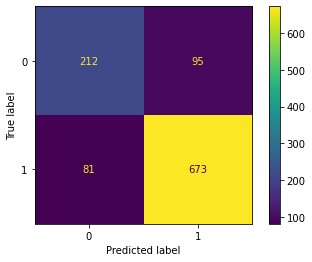

In [40]:
Y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, y_train)
print("----------------Train Data--------------")
print("Accuracy",model_score)
print(metrics.classification_report(y_train,Y_train_predict))
plot_confusion_matrix(NB_model,X_train,y_train)

the AUC of Train Data 0.889 


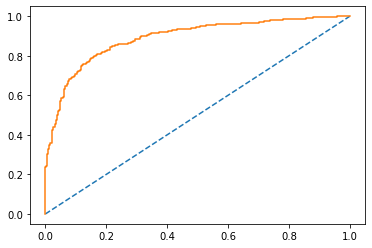

In [41]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the AUC of Train Data %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);


#### Test data

----------------Test Data--------------
Accuracy 0.8223684210526315
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



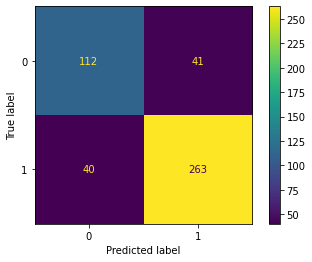

In [42]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, y_test)
print("----------------Test Data--------------")
print("Accuracy",model_score)
print(metrics.classification_report(y_test,Y_test_predict))
plot_confusion_matrix(NB_model,X_test,y_test);

the AUC of Test Data is 0.876 


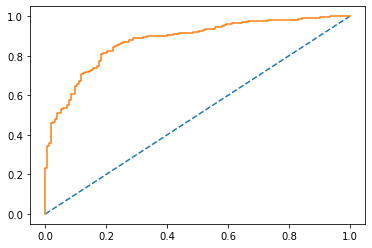

In [43]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the AUC of Test Data is %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


### KNN

In [44]:
X = data_knn.drop('IsLabour_or_not', axis=1)

# Copy target into the y dataframe.
y = data_knn[['IsLabour_or_not']]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [46]:

from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [47]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores=knn.score(X_test,y_test)
    ac_score.append(scores)
    
MCE=[1-x for x in ac_score]
MCE

[0.20175438596491224,
 0.17543859649122806,
 0.17763157894736847,
 0.17982456140350878,
 0.17543859649122806,
 0.17105263157894735,
 0.17324561403508776,
 0.17105263157894735,
 0.16666666666666663,
 0.16228070175438591]

#### Train Data

----------------Train Data--------------
Accuracy 0.8586239396795476
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       307
           1       0.89      0.91      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.86      0.86      0.86      1061



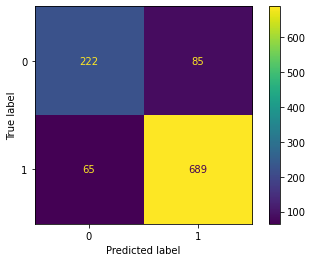

In [48]:
Y_train_predict=KNN_model.predict(X_train)
model_score=KNN_model.score(X_train, y_train)
print("----------------Train Data--------------")
print("Accuracy",model_score)
print(metrics.classification_report(y_train,Y_train_predict))
plot_confusion_matrix(KNN_model,X_train,y_train)

the AUC of Train Data 0.929 


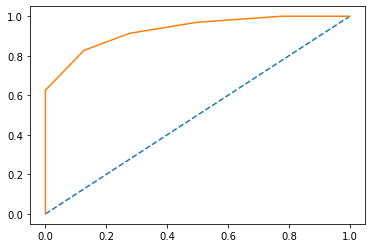

In [49]:
probs_train=KNN_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the AUC of Train Data %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

#### Test Data

----------------Test Data--------------
Accuracy 0.8223684210526315
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       153
           1       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



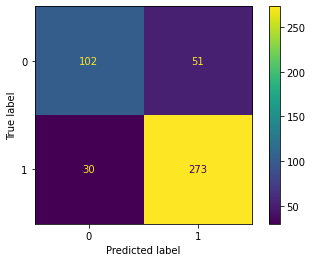

In [50]:
Y_test_predict=KNN_model.predict(X_test)
model_score=KNN_model.score(X_test, y_test)
print("----------------Test Data--------------")
print("Accuracy",model_score)
print(metrics.classification_report(y_test,Y_test_predict))
plot_confusion_matrix(KNN_model,X_test,y_test);

the AUC of Test Data is 0.881 


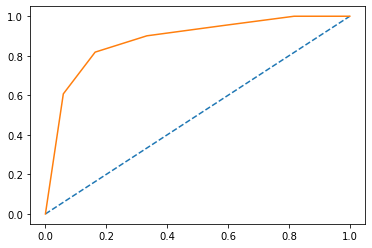

In [51]:
probs_test=KNN_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the AUC of Test Data is %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


### Linear Discriminant Analysis

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [53]:
X = data_lda.drop('IsLabour_or_not', axis=1)

# Copy target into the y dataframe.
y = data_lda[['IsLabour_or_not']]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [55]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

#### Train Data

----------------Train Data--------------
Accuracy 0.8341187558906692
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



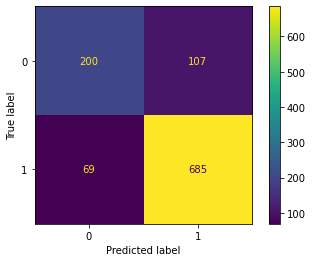

In [56]:
Y_train_predict=LDA_model.predict(X_train)
model_score=LDA_model.score(X_train, y_train)
print("----------------Train Data--------------")
print("Accuracy",model_score)
print(metrics.classification_report(y_train,Y_train_predict))
plot_confusion_matrix(LDA_model,X_train,y_train)

the AUC of Train Data 0.890 


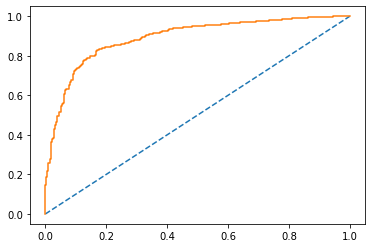

In [57]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the AUC of Train Data %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

#### Test Data

----------------Test Data--------------
Accuracy 0.831140350877193
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



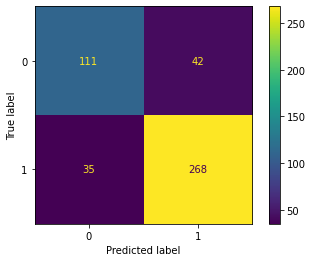

In [58]:
Y_test_predict=LDA_model.predict(X_test)
model_score=LDA_model.score(X_test, y_test)
print("----------------Test Data--------------")
print("Accuracy",model_score)
print(metrics.classification_report(y_test,Y_test_predict))
plot_confusion_matrix(LDA_model,X_test,y_test);

the AUC of Test Data is 0.888 


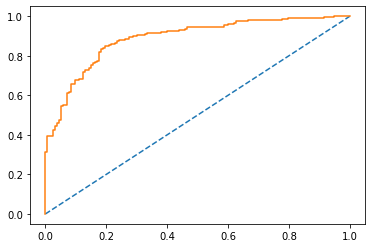

In [59]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the AUC of Test Data is %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

### Logistic Regression

In [60]:
X = data_lr.drop('IsLabour_or_not', axis=1)

# Copy target into the y dataframe.
y = data_lr[['IsLabour_or_not']]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)


In [62]:
from sklearn.linear_model import LogisticRegression


In [63]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

#### Train Data

----------------Train Data--------------
Accuracy 0.8341187558906692
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



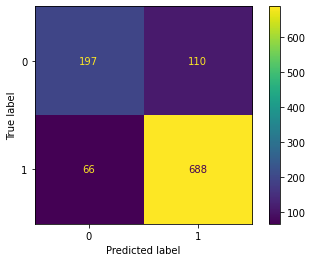

In [64]:
Y_train_predict=Logistic_model.predict(X_train)
model_score=Logistic_model.score(X_train, y_train)
print("----------------Train Data--------------")
print("Accuracy",model_score)
print(metrics.classification_report(y_train,Y_train_predict))
plot_confusion_matrix(Logistic_model,X_train,y_train)

the AUC of Train Data 0.890 


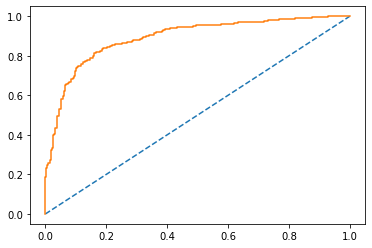

In [65]:
probs_train=Logistic_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the AUC of Train Data %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

#### Test Data

----------------Test Data--------------
Accuracy 0.8289473684210527
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



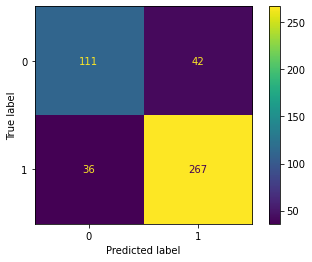

In [66]:
Y_test_predict=Logistic_model.predict(X_test)
model_score=Logistic_model.score(X_test, y_test)
print("----------------Test Data--------------")
print("Accuracy",model_score)
print(metrics.classification_report(y_test,Y_test_predict))
plot_confusion_matrix(Logistic_model,X_test,y_test);

the AUC of Test Data is 0.883 


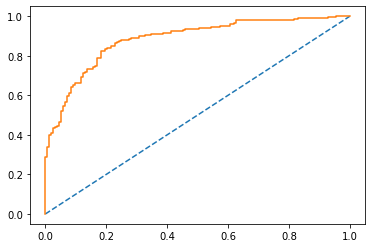

In [67]:
probs_test=Logistic_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the AUC of Test Data is %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

### Bagging

In [68]:
X = data_ba.drop('IsLabour_or_not', axis=1)

# Copy target into the y dataframe.
y = data_ba[['IsLabour_or_not']]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)


In [70]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [71]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)

Bagging_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

#### Train Data

----------------Train Data--------------
Accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



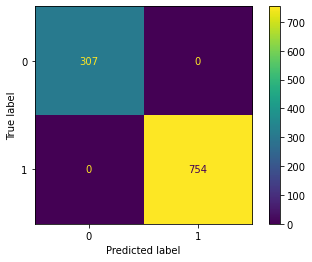

In [72]:
Y_train_predict=Bagging_model.predict(X_train)
model_score=Bagging_model.score(X_train, y_train)
print("----------------Train Data--------------")
print("Accuracy",model_score)
print(metrics.classification_report(y_train,Y_train_predict))
plot_confusion_matrix(Bagging_model,X_train,y_train)

the AUC of Train Data 1.000 


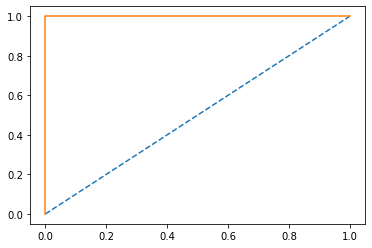

In [73]:
probs_train=Bagging_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the AUC of Train Data %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

#### Test Data

----------------Test Data--------------
Accuracy 0.8201754385964912
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



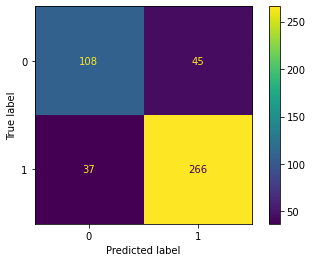

In [74]:
Y_test_predict=Bagging_model.predict(X_test)
model_score=Bagging_model.score(X_test, y_test)
print("----------------Test Data--------------")
print("Accuracy",model_score)
print(metrics.classification_report(y_test,Y_test_predict))
plot_confusion_matrix(Bagging_model,X_test,y_test);

the AUC of Test Data is 0.882 


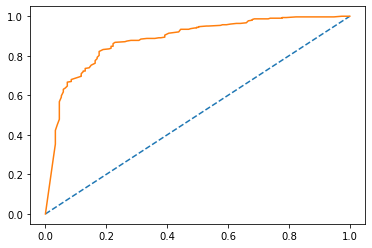

In [75]:
probs_test=Bagging_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the AUC of Test Data is %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

### AdaBoost

In [76]:
X = data_bo.drop('IsLabour_or_not', axis=1)

# Copy target into the y dataframe.
y = data_bo[['IsLabour_or_not']]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)


In [78]:
from sklearn.ensemble import AdaBoostClassifier

In [79]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

#### Train Data

----------------Train Data--------------
Accuracy 0.8501413760603205
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



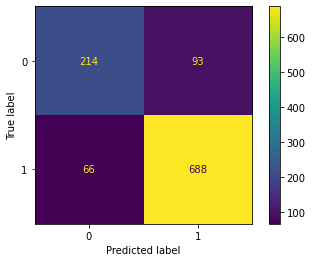

In [80]:
Y_train_predict=ADB_model.predict(X_train)
model_score=ADB_model.score(X_train, y_train)
print("----------------Train Data--------------")
print("Accuracy",model_score)
print(metrics.classification_report(y_train,Y_train_predict))
plot_confusion_matrix(ADB_model,X_train,y_train)

the AUC of Train Data 0.915 


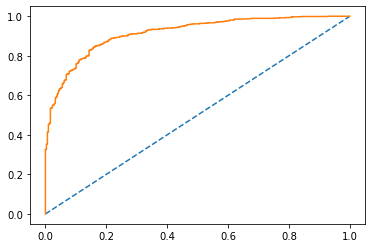

In [81]:
probs_train=ADB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the AUC of Train Data %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

#### Test Data

----------------Test Data--------------
Accuracy 0.8135964912280702
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



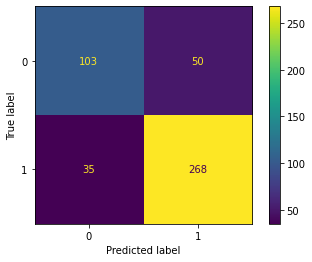

In [82]:
Y_test_predict=ADB_model.predict(X_test)
model_score=ADB_model.score(X_test, y_test)
print("----------------Test Data--------------")
print("Accuracy",model_score)
print(metrics.classification_report(y_test,Y_test_predict))
plot_confusion_matrix(ADB_model,X_test,y_test);

the AUC of Test Data is 0.877 


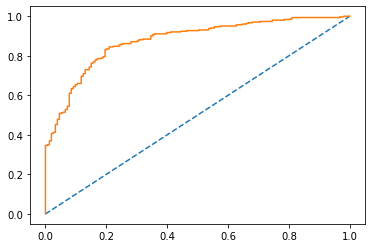

In [83]:
probs_test=ADB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the AUC of Test Data is %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

### Gradient Boosting

In [84]:
X = data_gbo.drop('IsLabour_or_not', axis=1)

# Copy target into the y dataframe.
y = data_gbo[['IsLabour_or_not']]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)


In [86]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

#### Train Data

----------------Train Data--------------
Accuracy 0.8925541941564562
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



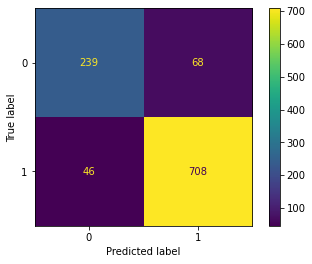

In [87]:
Y_train_predict=gbc_model.predict(X_train)
model_score=gbc_model.score(X_train, y_train)
print("----------------Train Data--------------")
print("Accuracy",model_score)
print(metrics.classification_report(y_train,Y_train_predict))
plot_confusion_matrix(gbc_model,X_train,y_train)

the AUC of Train Data 0.951 


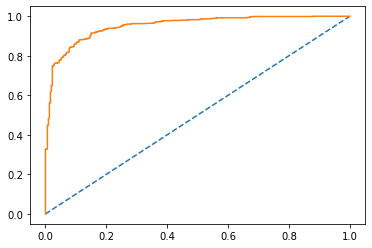

In [88]:
probs_train=gbc_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the AUC of Train Data %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

#### Test Data

----------------Test Data--------------
Accuracy 0.8355263157894737
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



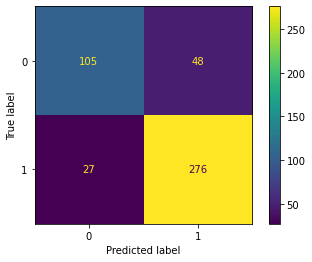

In [89]:
Y_test_predict=gbc_model.predict(X_test)
model_score=gbc_model.score(X_test, y_test)
print("----------------Test Data--------------")
print("Accuracy",model_score)
print(metrics.classification_report(y_test,Y_test_predict))
plot_confusion_matrix(gbc_model,X_test,y_test);

the AUC of Test Data is 0.899 


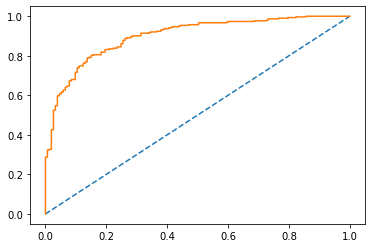

In [90]:
probs_test=gbc_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the AUC of Test Data is %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


## Problem 2:
## In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:
## 1.	President Franklin D. Roosevelt in 1941
## 2.	President John F. Kennedy in 1961
## 3.	President Richard Nixon in 1973


In [91]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')


[nltk_data] Downloading package inaugural to C:\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.


### Number of Characters in each file

In [92]:
#get the length of the data
number_of_characters = len(Roosevelt)

print('Number of characters in Roosevelt file:', number_of_characters)

number_of_characters = len(Kennedy)

print('Number of characters in Kennedy file:', number_of_characters)

number_of_characters = len(Nixon)

print('Number of characters in Nixon file:', number_of_characters)

Number of characters in Roosevelt file: 7571
Number of characters in Kennedy file: 7618
Number of characters in Nixon file: 9991


### No of Words in each text file

In [93]:
# number of words in kennedy

x = inaugural.raw('1961-Kennedy.txt')
words = x.split()
print('Number of words in Kennedy file:', len(words))

# number of words in Nixon

y = inaugural.raw('1973-Nixon.txt')
words = y.split()
print('Number of words in Nixon file:', len(words))

# number of words in Roosevelt

z = inaugural.raw('1941-Roosevelt.txt')
words = y.split()
print('Number of words in Roosevelt file:', len(words))

Number of words in Kennedy file: 1390
Number of words in Nixon file: 1819
Number of words in Roosevelt file: 1819


### No of Sentences in each file

In [94]:
# number of sentences in Nixon
y1 =pd.DataFrame({'Text':inaugural.raw('1973-Nixon.txt')},index =[0])
y1['sentences'] = y1['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y1

Text  sentences
0  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...         68

In [95]:
# number of sentences in Kennedy
y =pd.DataFrame({'Text':inaugural.raw('1961-Kennedy.txt')},index =[0])
y['sentences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

Text  sentences
0  Vice President Johnson, Mr. Speaker, Mr. Chief...         52

In [96]:
# number of sentences in Roosevelt
y =pd.DataFrame({'Text':inaugural.raw('1941-Roosevelt.txt')},index =[0])
y['sentences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

Text  sentences
0  On each national day of inauguration since 178...         67

### Remove all the stopwords from all the speeches

In [97]:
# Remove all the stopwords from Roosevelt speeches.
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(Roosevelt)

filtered_sentence = [w for w in word_tokens if not w in stop_words]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
        
print(word_tokens)
print(filtered_sentence)

['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', '.', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', '.', 'To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', ',', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', '.',

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [98]:
# Remove all the stopwords from Kennedy speeches.
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(Kennedy)

filtered_sentence = [w for w in word_tokens if not w in stop_words]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
        
print(word_tokens)
print(filtered_sentence)

['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.', 'The', 'world', 'is', 'very', 'different', 'now', '.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.', 'And', 'yet', 'the', 'same', 'revolutionary', 

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [99]:
# Remove all the stopwords from Nixon speeches.
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(Nixon)

filtered_sentence = [w for w in word_tokens if not w in stop_words]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
        
print(word_tokens)
print(filtered_sentence)

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.', 'As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.', 'The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat', 'and', 'isolation', 'that'

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Mention the top three words

In [100]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter

tokenizer = RegexpTokenizer(r'\w+')
roosevelt_no_punc = tokenizer.tokenize(Roosevelt)
set(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common()

[('Nation', 12),
 ('Know', 10),
 ('Spirit', 9),
 ('Life', 9),
 ('Democracy', 9),
 ('Us', 8),
 ('People', 7),
 ('America', 7),
 ('Years', 6),
 ('Freedom', 6),
 ('Human', 5),
 ('New', 5),
 ('Body', 5),
 ('Mind', 5),
 ('Speaks', 5),
 ('Day', 4),
 ('States', 4),
 ('Government', 4),
 ('Must', 4),
 ('Something', 4),
 ('Faith', 4),
 ('United', 3),
 ('Task', 3),
 ('Within', 3),
 ('History', 3),
 ('Nations', 3),
 ('Three', 3),
 ('Live', 3),
 ('Future', 3),
 ('Free', 3),
 ('Alone', 3),
 ('Still', 3),
 ('Every', 3),
 ('Continent', 3),
 ('Like', 3),
 ('Person', 3),
 ('World', 3),
 ('Sacred', 3),
 ('Came', 3),
 ('First', 3),
 ('Destiny', 3),
 ('National', 2),
 ('1789', 2),
 ('Sense', 2),
 ('Washington', 2),
 ('Create', 2),
 ('Together', 2),
 ('Disruption', 2),
 ('Without', 2),
 ('Time', 2),
 ('Midst', 2),
 ('Stock', 2),
 ('May', 2),
 ('Lives', 2),
 ('Little', 2),
 ('Measure', 2),
 ('Doubt', 2),
 ('Measured', 2),
 ('Americans', 2),
 ('True', 2),
 ('Republic', 2),
 ('Acted', 2),
 ('Security', 2),
 ('

In [101]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter

tokenizer = RegexpTokenizer(r'\w+')
kennedy_no_punc = tokenizer.tokenize(Kennedy)
set(w.title() for w in kennedy_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in kennedy_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common()

[('Let', 16),
 ('Us', 12),
 ('World', 8),
 ('Sides', 8),
 ('New', 7),
 ('Pledge', 7),
 ('Citizens', 5),
 ('Power', 5),
 ('Shall', 5),
 ('Free', 5),
 ('Nations', 5),
 ('Ask', 5),
 ('President', 4),
 ('Fellow', 4),
 ('Freedom', 4),
 ('First', 4),
 ('Americans', 4),
 ('Peace', 4),
 ('Always', 4),
 ('Cannot', 4),
 ('Hope', 4),
 ('Help', 4),
 ('Arms', 4),
 ('Country', 4),
 ('Call', 4),
 ('Today', 3),
 ('Well', 3),
 ('God', 3),
 ('Human', 3),
 ('Poverty', 3),
 ('Life', 3),
 ('Globe', 3),
 ('Dare', 3),
 ('Go', 3),
 ('Generation', 3),
 ('Know', 3),
 ('Bear', 3),
 ('Control', 3),
 ('May', 3),
 ('Good', 3),
 ('Join', 3),
 ('Begin', 3),
 ('Never', 3),
 ('Final', 3),
 ('Vice', 2),
 ('Mr', 2),
 ('Forebears', 2),
 ('Century', 2),
 ('Hands', 2),
 ('Forms', 2),
 ('Yet', 2),
 ('Around', 2),
 ('Rights', 2),
 ('Hand', 2),
 ('Revolution', 2),
 ('Word', 2),
 ('Forth', 2),
 ('Time', 2),
 ('Friend', 2),
 ('Foe', 2),
 ('Passed', 2),
 ('Nation', 2),
 ('Committed', 2),
 ('Every', 2),
 ('Whether', 2),
 ('Burden'

In [102]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter

tokenizer = RegexpTokenizer(r'\w+')
nixon_no_punc = tokenizer.tokenize(Nixon)
set(w.title() for w in nixon_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in nixon_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common()

[('Us', 26),
 ('Let', 22),
 ('America', 21),
 ('Peace', 19),
 ('World', 18),
 ('New', 15),
 ('Nation', 11),
 ('Responsibility', 11),
 ('Government', 10),
 ('Great', 9),
 ('Home', 9),
 ('Abroad', 8),
 ('Together', 7),
 ('Years', 7),
 ('Shall', 7),
 ('Policies', 7),
 ('Role', 7),
 ('Make', 7),
 ('Every', 7),
 ('History', 7),
 ('Better', 7),
 ('Time', 6),
 ('Right', 6),
 ('People', 6),
 ('Help', 6),
 ('Four', 5),
 ('Today', 5),
 ('Responsibilities', 5),
 ('Progress', 5),
 ('Respect', 5),
 ('Others', 5),
 ('Act', 5),
 ('Promise', 4),
 ('Long', 4),
 ('Work', 4),
 ('Freedom', 4),
 ('God', 4),
 ('Old', 4),
 ('Proud', 4),
 ('Faith', 4),
 ('Mr', 3),
 ('Country', 3),
 ('Share', 3),
 ('Resolve', 3),
 ('Retreat', 3),
 ('Greatly', 3),
 ('Century', 3),
 ('Nations', 3),
 ('Bold', 3),
 ('Another', 3),
 ('Future', 3),
 ('Forward', 3),
 ('Build', 3),
 ('Structure', 3),
 ('Live', 3),
 ('System', 3),
 ('Gladly', 3),
 ('Challenges', 3),
 ('Away', 3),
 ('Way', 3),
 ('Individual', 3),
 ('Ask', 3),
 ('Ashamed

### Word Cloud

In [103]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off");

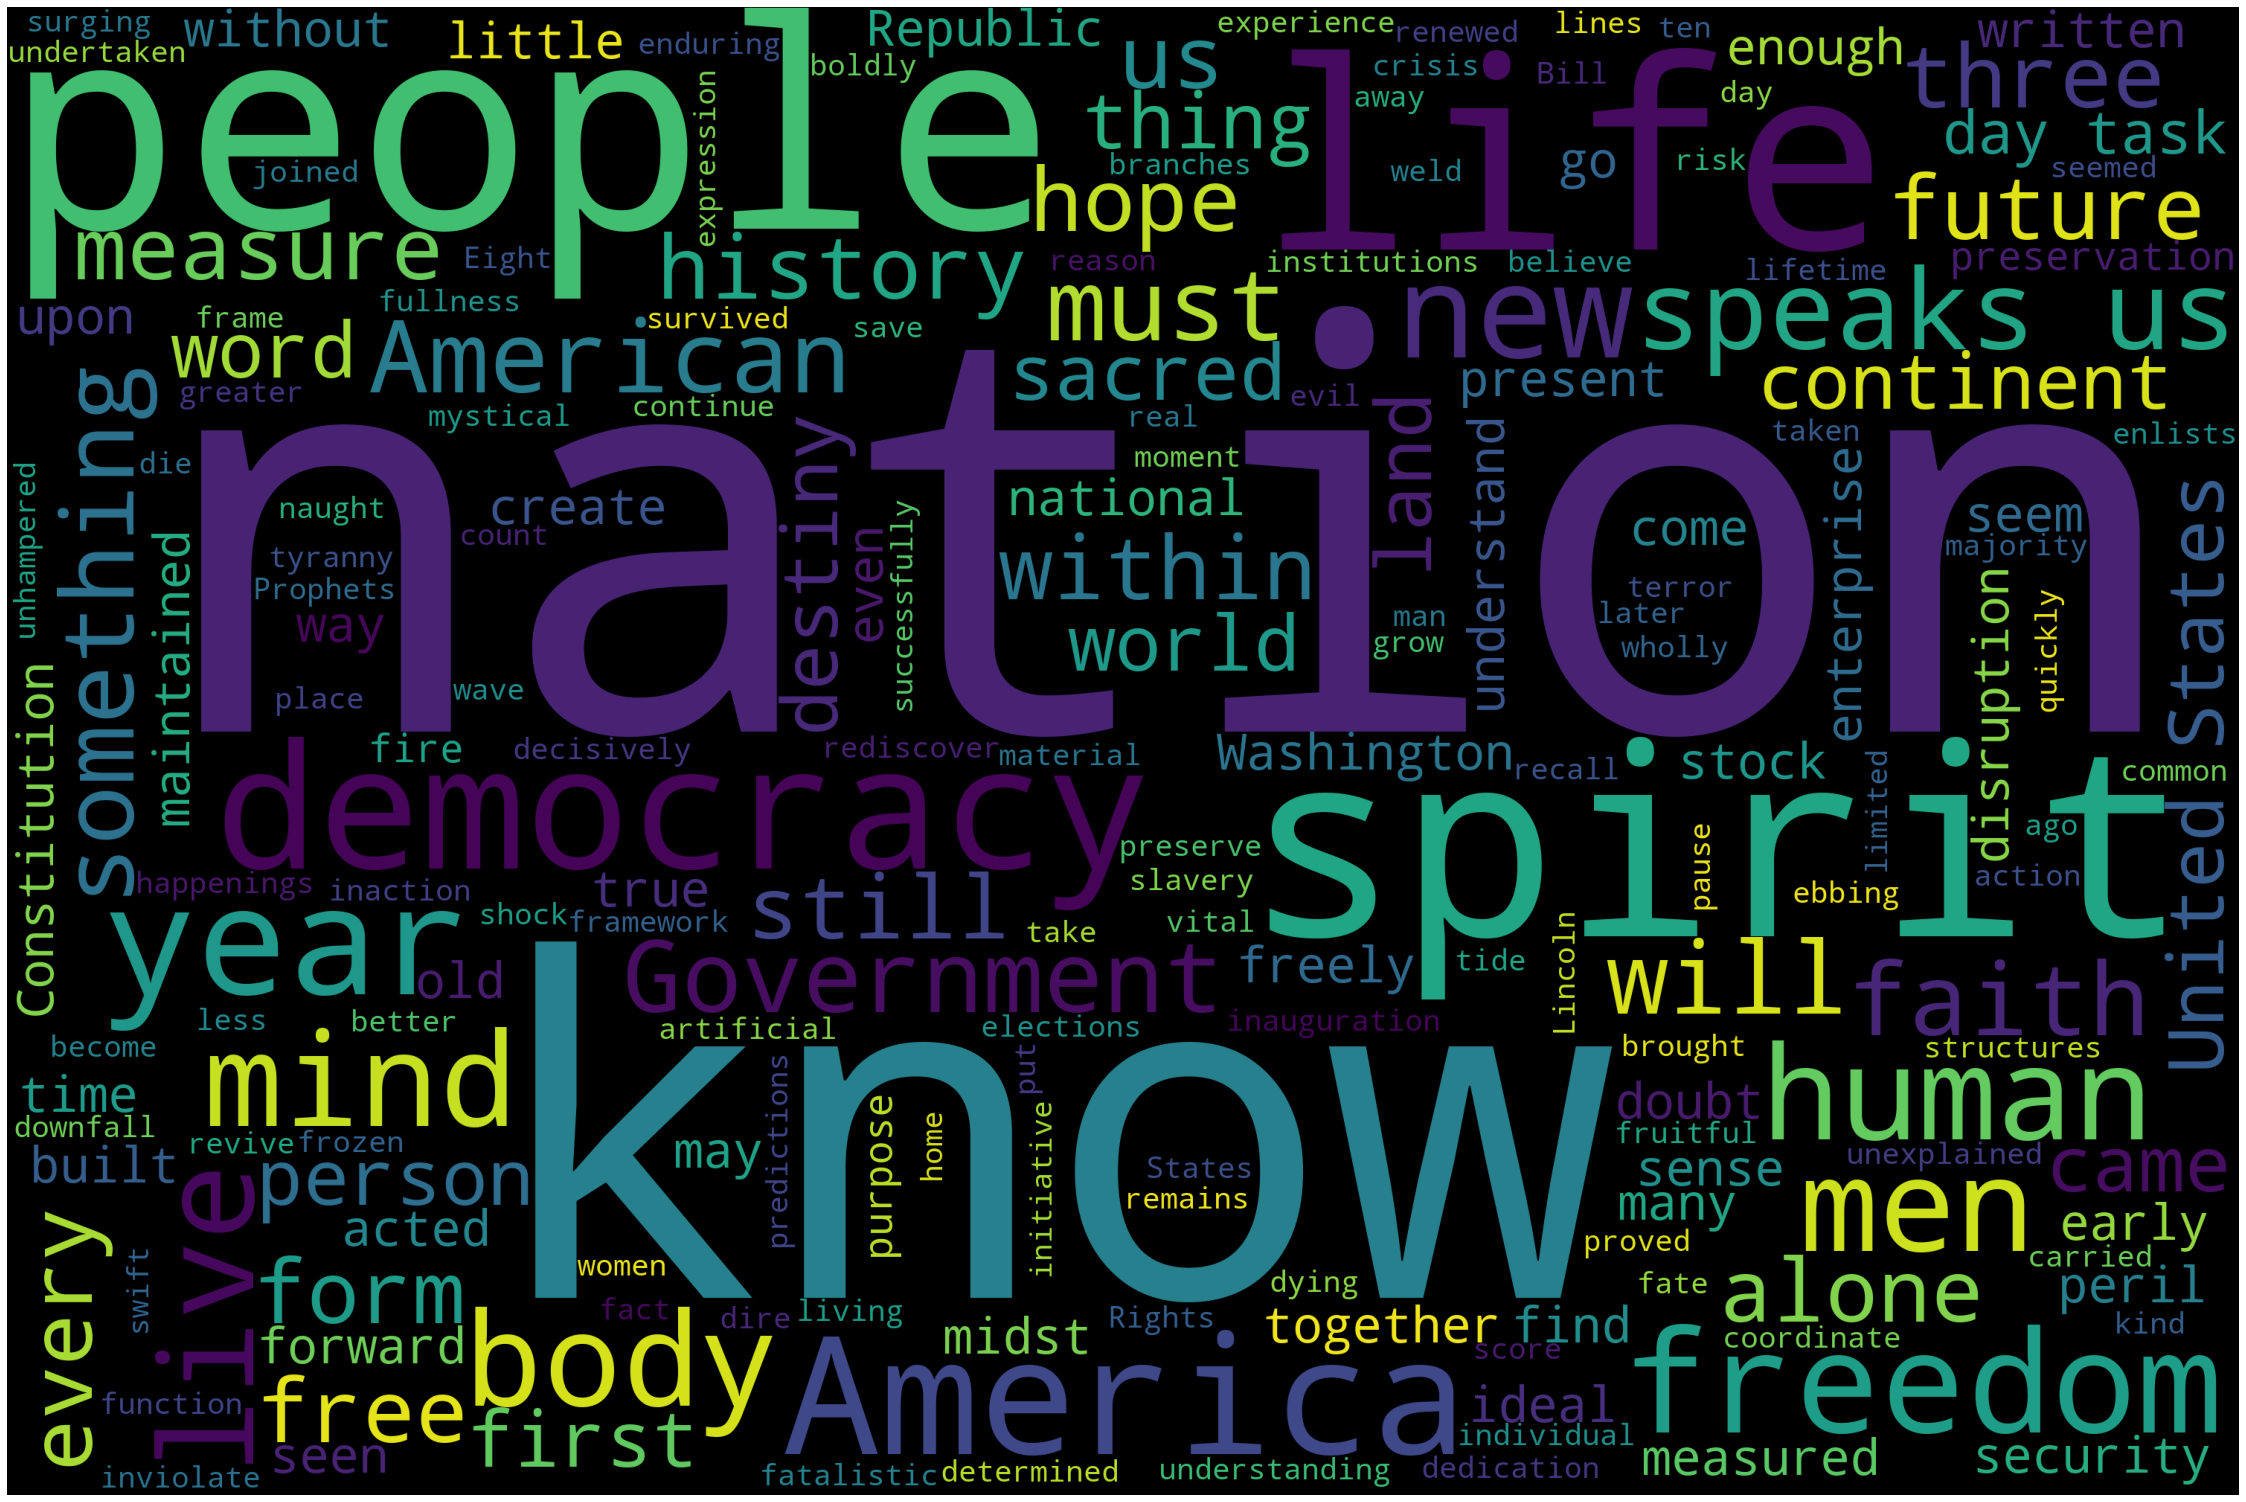

In [104]:
wordcloud = WordCloud(width=3000,height=2000,random_state=1).generate(Roosevelt) 
plot_cloud(wordcloud)

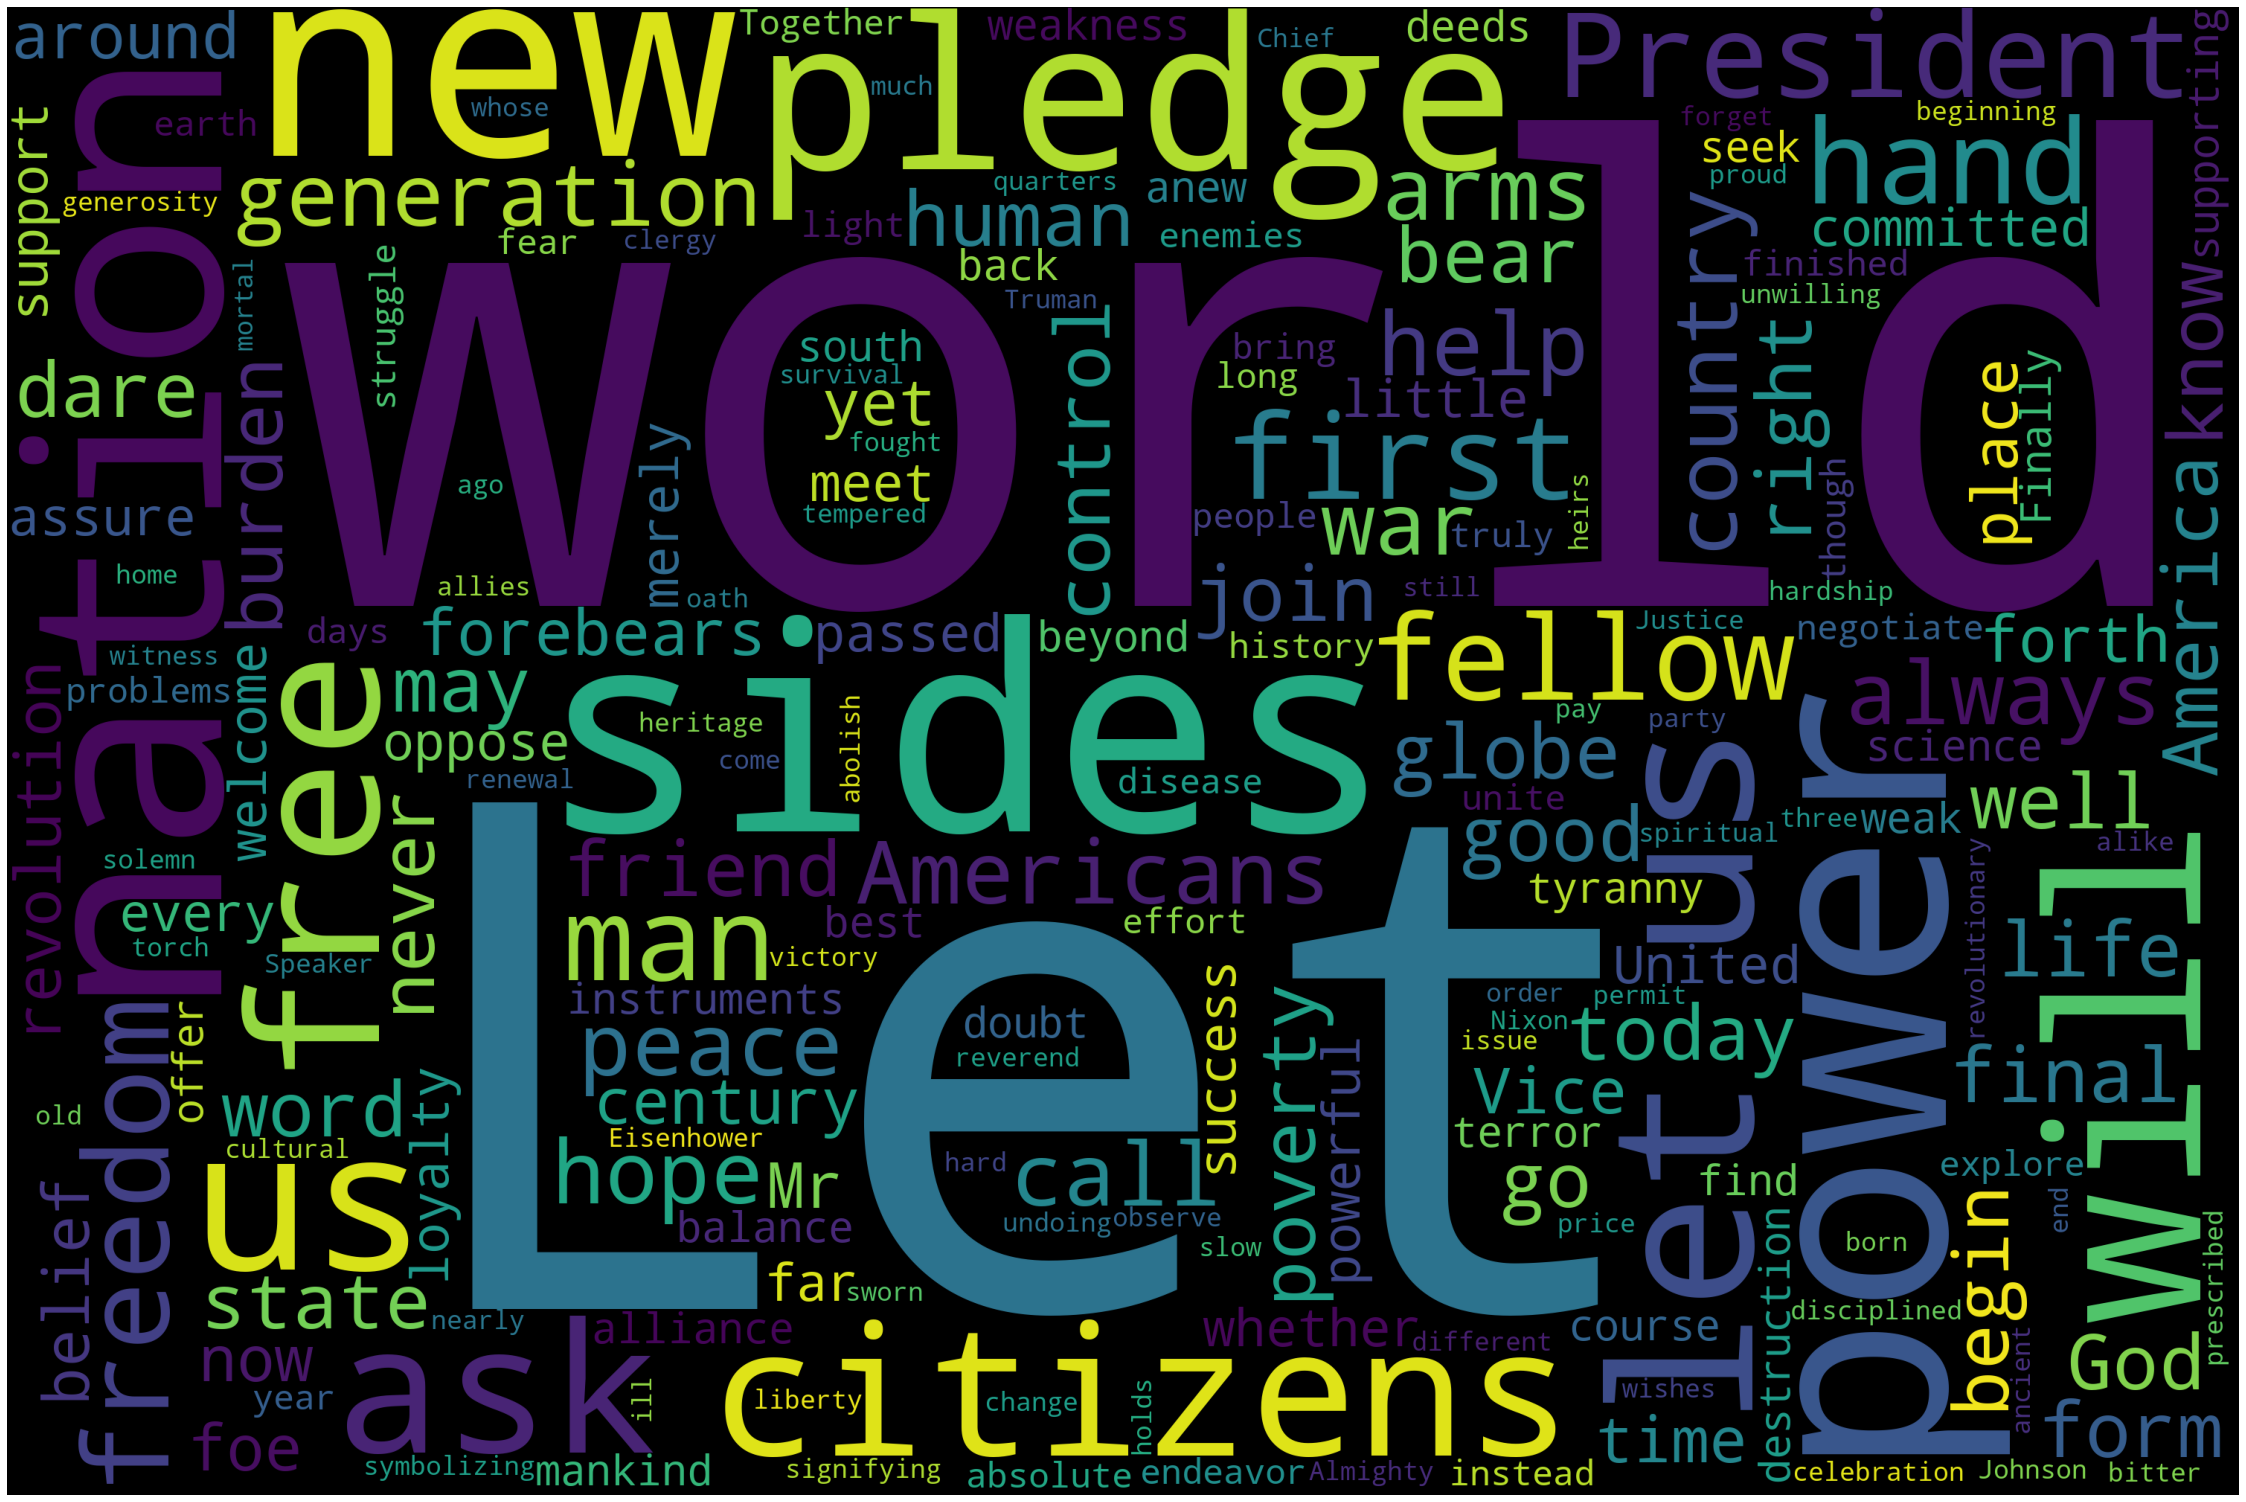

In [105]:
wordcloud = WordCloud(width=3000,height=2000,random_state=1).generate(Kennedy) 
plot_cloud(wordcloud)

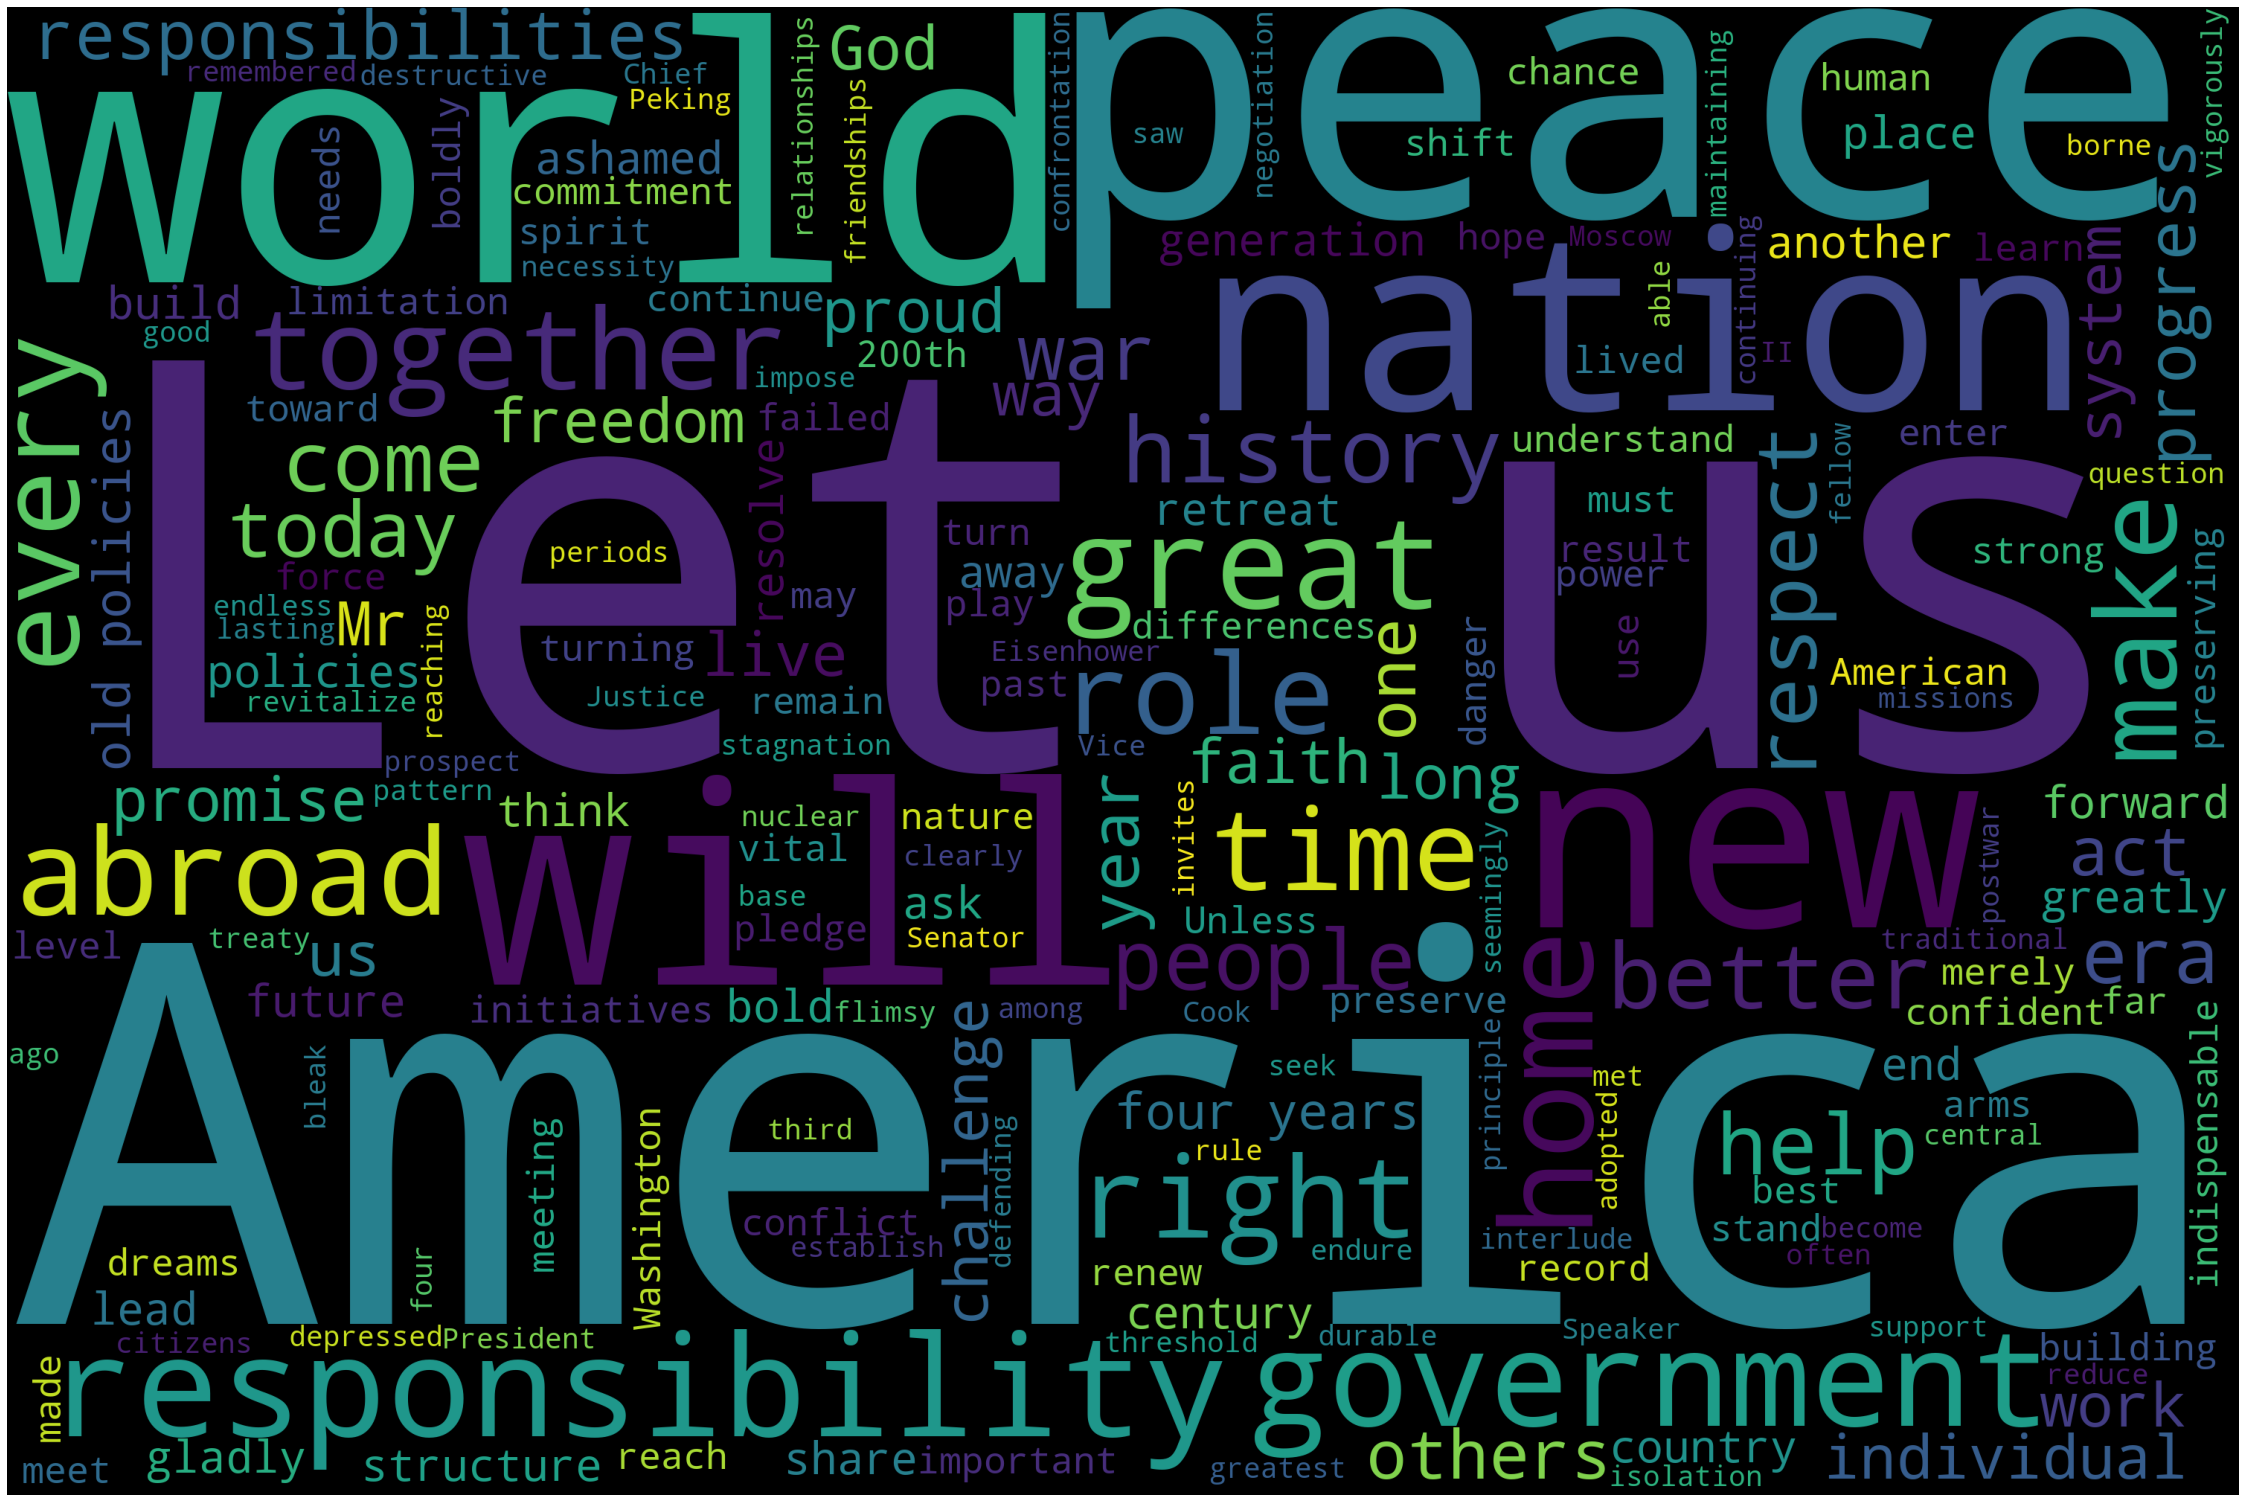

In [106]:
wordcloud = WordCloud(width=3000,height=2000,random_state=1).generate(Nixon) 
plot_cloud(wordcloud)

## END